In [1]:
pip install stemgraphic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
from scipy.stats.mstats import gmean, hmean, tmean
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr
import stemgraphic
%matplotlib inline

### 데이터 불러오기 및 확인


In [3]:
titanic = pd.read_csv('./data/train.csv')
print(titanic.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


### 데이터 기본정보 확인


In [4]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- PassengerID는 정보가 의미 없음
- Cabin은 결측치가 과반 이상(8개 중 6개 꼴)
- 질적 변수의 타입 카테고리형으로 변환

In [5]:
# feature 삭제
del_feat = ['PassengerId', 'Cabin']
titanic = titanic.drop(del_feat, axis=1)

In [6]:
# 질적 변수의 데이터 타입을 category로 변경하기
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']
for col in qual : 
    titanic[col] = titanic[col].astype('category')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB
None


### 기술통계

In [7]:
print(titanic.describe(include='all'))

        Survived  Pclass                 Name   Sex         Age       SibSp  \
count      891.0   891.0                  891   891  714.000000  891.000000   
unique       2.0     3.0                  891     2         NaN         NaN   
top          0.0     3.0  Abbing, Mr. Anthony  male         NaN         NaN   
freq       549.0   491.0                    1   577         NaN         NaN   
mean         NaN     NaN                  NaN   NaN   29.699118    0.523008   
std          NaN     NaN                  NaN   NaN   14.526497    1.102743   
min          NaN     NaN                  NaN   NaN    0.420000    0.000000   
25%          NaN     NaN                  NaN   NaN   20.125000    0.000000   
50%          NaN     NaN                  NaN   NaN   28.000000    0.000000   
75%          NaN     NaN                  NaN   NaN   38.000000    1.000000   
max          NaN     NaN                  NaN   NaN   80.000000    8.000000   

             Parch Ticket        Fare Embarked  
co

### 질적변수
- 도수분포표, 상대도수분포표

In [8]:
# 도수분포표
freq = pd.DataFrame(titanic['Survived'].value_counts())
print(freq)

   Survived
0       549
1       342


In [9]:
# 상대도수분포표 추가
freq['상대도수'] = freq['Survived'].apply(lambda x: x/freq['Survived'].sum())
freq = freq.rename(columns={'Survived':'도수'})
print(freq)

    도수      상대도수
0  549  0.616162
1  342  0.383838


- 상관계수 : 스피어만과 켄달의 타우

In [10]:
# 유의수준 : 0.05
corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
print(f'스피어만 상관계수는 {corr:.3f}, p-value는 {p:.3f}')

corr, p = kendalltau(titanic['Survived'], titanic['Pclass'])
print(f'켄달타우 상관계수는 {corr:.3f}, p-value는 {p:.3f}')

스피어만 상관계수는 -0.340, p-value는 0.000
켄달타우 상관계수는 -0.324, p-value는 0.000


- 질적변수 탐색 시각화

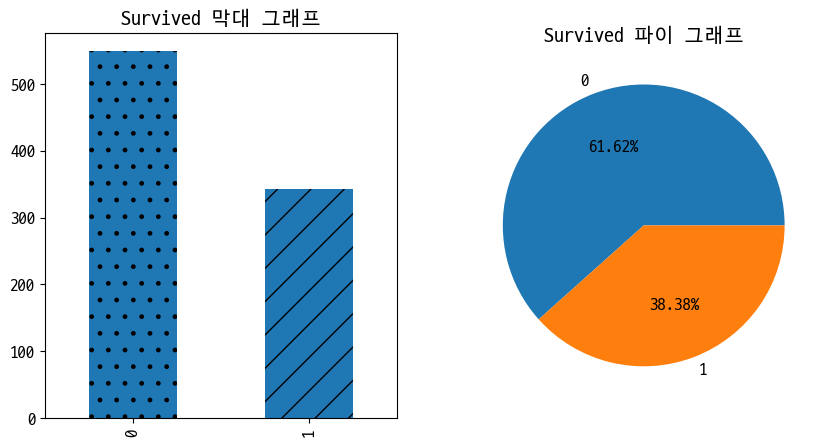

In [11]:
# 환경설정
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,2, figsize=(10,5))

# 막대 그래프
ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax=ax[0], hatch=['.','/'])

# 원 그래프
ax[1].set_title('Survived 파이 그래프')
ax[1].pie(freq['도수'].values, labels=freq['도수'].index,
          autopct='%.2f%%')

plt.show()

### 양적변수
- 도수분포표, 상대도수분포표

In [12]:
# 계급의 개수를 지정하여 도수분포표 생성
result1 = pd.cut(titanic['Age'], bins=5)
freq1 = pd.DataFrame(result1.value_counts()).reset_index()
freq1 = freq1.rename(columns={'index':'계급', 'Age':'도수'}).sort_values(by='계급')
print(freq1)

                 계급   도수
2    (0.34, 16.336]  100
0  (16.336, 32.252]  346
1  (32.252, 48.168]  188
3  (48.168, 64.084]   69
4    (64.084, 80.0]   11


In [13]:
# 계급의 범위를 지정하여 도수분포표 생성
result2 = pd.cut(titanic['Age'], bins=[0, 19, 39, 59, float('inf')])
freq2 = pd.DataFrame(result2.value_counts()).reset_index()
freq2 = freq2.rename(columns={'index':'계급', 'Age':'도수'}).sort_values(by='계급')
print(freq2)

             계급   도수
1   (0.0, 19.0]  164
0  (19.0, 39.0]  387
2  (39.0, 59.0]  137
3   (59.0, inf]   26


In [14]:
# freq1의 상대 도수분포표 생성
freq1['상대도수'] = freq1['도수'].apply(lambda x: x/freq1['도수'].sum())
print(freq1)

                 계급   도수      상대도수
2    (0.34, 16.336]  100  0.140056
0  (16.336, 32.252]  346  0.484594
1  (32.252, 48.168]  188  0.263305
3  (48.168, 64.084]   69  0.096639
4    (64.084, 80.0]   11  0.015406


- 계산적 대표값

In [15]:
mean_a = titanic['Fare'].mean()
print(f'Fare 산술평균: {mean_a:.2f}')

example1 = [1.1, 1.3, 1.4, 1.5]
mean_g = gmean(example1)
print(f'exmaple1 기하평균: {mean_g:.2f}')

exmaple2 = [3, 6]
mean_h = hmean(exmaple2)
print(f'exmaple2 조화평균: {mean_h:.2f}')

example3 = [1, 3, 5, 9, 11, 1000]
mean_t = tmean(example3, (1,100))
print(f'exmaple3 절사평균1: {mean_t:.2f}')

limit_down = np.percentile(example3, 10) # 10%
limit_up = np.percentile(example3, 90)   # 90%
mean_t2 = tmean(example3, (limit_down, limit_up))
print(f'exmaple3 절사평균2: {mean_t2:.2f}')

def QM(data) : 
    return np.sqrt(np.sum(np.array(data)**2))
example4 = [1, 2, 3, 4, 100]
example5 = [1, 2, 3, 4, 5]
print(f'exmaple4 평방평균: {QM(example4):.2f}')
print(f'exmaple5 평방평균: {QM(example5):.2f}')

Fare 산술평균: 32.20
exmaple1 기하평균: 1.32
exmaple2 조화평균: 4.00
exmaple3 절사평균1: 5.80
exmaple3 절사평균2: 7.00
exmaple4 평방평균: 100.15
exmaple5 평방평균: 7.42


- 위치적 대표값

In [16]:
print('중위수: ', titanic['Fare'].median())
print('최빈값: ', titanic['Fare'].mode()[0])
print('1사분위수: ', titanic['Fare'].quantile(q=0.25))
print('2사분위수: ', titanic['Fare'].quantile(q=0.5))
print('3사분위수: ', titanic['Fare'].quantile(q=0.75))
print('10백분위수: ', np.percentile(titanic['Fare'], 10)) # 하위 10%

중위수:  14.4542
최빈값:  8.05
1사분위수:  7.9104
2사분위수:  14.4542
3사분위수:  31.0
10백분위수:  7.55


- 절대적 산포도

In [17]:
print('범위: ', titanic['Fare'].max() - titanic['Fare'].min())

def IQR(data) : 
    return data.quantile(0.75) - data.quantile(0.25)
print('사분위범위: %.2f' % (IQR(titanic['Fare'])))

def MD(data) : 
    return np.mean(np.abs(np.array(data) - np.mean(data)))
print('평균편차: %.2f' %(MD(titanic['Fare'])))

print('사분편차: %.2f' %(IQR(titanic['Fare']/2)))

print('모분산: %.2f' %(titanic['Fare'].var(ddof=0)))
print('표본분산: %.2f' %(titanic['Fare'].var(ddof=1)))

print('모표준편차: %.2f' %(titanic['Fare'].std(ddof=0)))
print('표본표준편차: %.2f' %(titanic['Fare'].std(ddof=1)))

범위:  512.3292
사분위범위: 23.09
평균편차: 28.16
사분편차: 11.54
모분산: 2466.67
표본분산: 2469.44
모표준편차: 49.67
표본표준편차: 49.69


- 상대적 산포도

In [18]:
print('사분위편차계수 : %.2f' %(IQR(titanic['Fare'])/2/titanic['Fare'].median()))
print('평균편차계수: %.2f' %(MD(titanic['Fare'])/titanic['Fare'].mean()))
print('모집단 변동계수 :%.2f' %(titanic['Fare'].std(ddof=0)/titanic['Fare'].mean()))
print('표본집단 변동계수 : %.2f' %(titanic['Fare'].std(ddof=1)/titanic['Fare'].mean()))

사분위편차계수 : 0.80
평균편차계수: 0.87
모집단 변동계수 :1.54
표본집단 변동계수 : 1.54


- 왜도, 첨도

In [19]:
# pandas
print('왜도: %.3f, 첨도 : %.3f' %(titanic['Fare'].skew(), titanic['Fare'].kurt()))

왜도: 4.787, 첨도 : 33.398


In [20]:
# scipy
ssF = skew(titanic['Fare'], bias=False)
skF = kurtosis(titanic['Fare'], bias=False)
ssT = skew(titanic['Fare'], bias=True)
skT = kurtosis(titanic['Fare'], bias=True)
print('왜도: %.3f(%.3f), 첨도: %.3f(%.3f)' % (ssF, ssT, skF, skT))

왜도: 4.787(4.779), 첨도: 33.398(33.204)


- 피어슨의 상관계수

In [21]:
titanic = titanic.dropna() # 결측치가 없어야 함.
corr, p = pearsonr(titanic['Age'], titanic['Fare'])
print(f'피어슨 사아관계수 {corr:.3f}, p-value {p:.3f}')

피어슨 사아관계수 0.093, p-value 0.013


- 양적변수 탐색 시각화

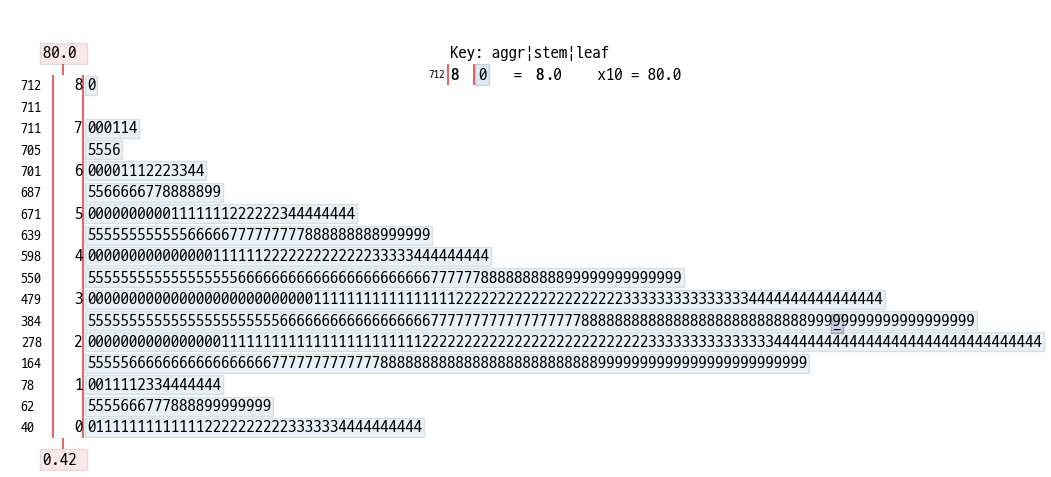

In [22]:
stemgraphic.stem_graphic(titanic['Age'])
plt.show()

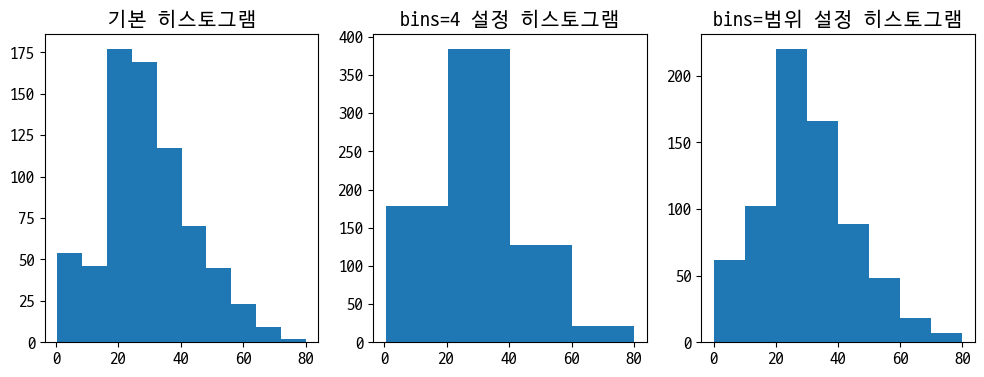

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].hist(titanic['Age'])
ax[0].set_title('기본 히스토그램')

# bin number 설정
ax[1].hist(titanic['Age'], bins=4)
ax[1].set_title('bins=4 설정 히스토그램')

## bin edges 설정
ax[2].hist(titanic['Age'], bins=[i for i in range(0,90,10)])
ax[2].set_title('bins=범위 설정 히스토그램')

plt.show()

In [24]:
# 오자이브(ogive) 함수 정의
def OGIVE(data, bins_option) : 
    result1 = pd.cut(data, bins=bins_option)
    freq1 = pd.DataFrame(result1.value_counts()).reset_index().rename(columns=\
                                                                      {'index':'계급',
                                                                       'Age':'도수'}).sort_values(by='계급' )
    freq1['누적도수'] = freq1['도수'].cumsum()
    freq1['계급값'] = freq1['계급'].apply(lambda x: (x.left+x.right)/2)
    plt.plot(freq1['계급값'], freq1['누적도수'], marker='o')
    plt.xticks(freq1['계급값'])
    plt.ylabel('누적도수')
    plt.xlabel('계급값')
    plt.title('Ogive (bins: %s)' %bins_option)
    return freq1, plt.show()

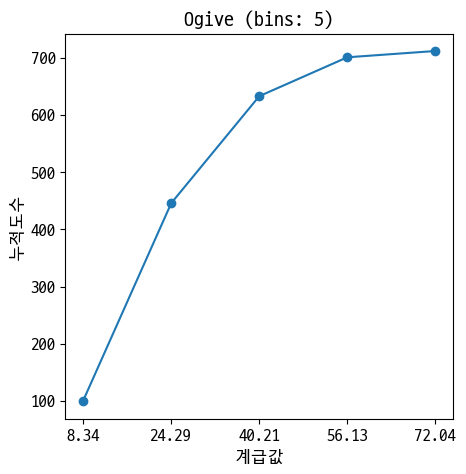

In [25]:
freq, img = OGIVE(data=titanic['Age'], bins_option=5)

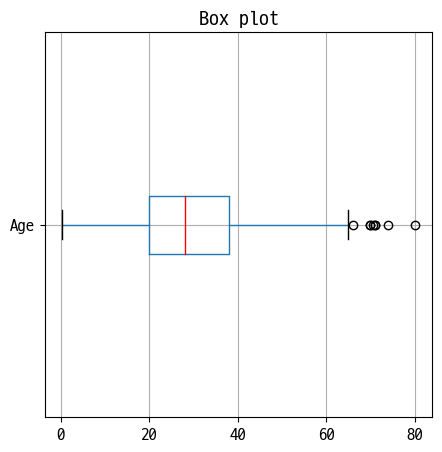

In [29]:
titanic[['Age']].boxplot(vert=False, medianprops={'color':'red'})
plt.title('Box plot')
plt.yticks(ticks=[1], labels=['Age'])
plt.show()

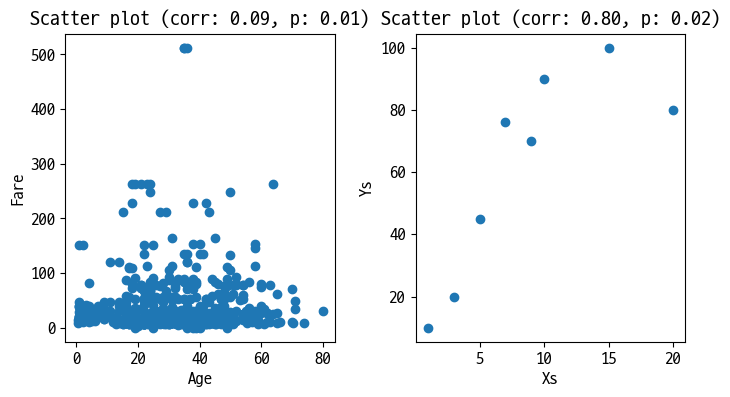

In [37]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

ax[0].scatter(titanic['Age'], titanic['Fare'])
ax[0].set_title('Scatter plot (corr: %.2f, p: %.2f)' %(pearsonr(titanic['Age'],
                                                                titanic['Fare'])))
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')

Xs = [1,3,5,7,9,15,20,10]
Ys = [10,20,45,76,70,100,80,90]
ax[1].scatter(Xs, Ys)
ax[1].set_title('Scatter plot (corr: %.2f, p: %.2f)' %(pearsonr(Xs, Ys)))
ax[1].set_xlabel('Xs')
ax[1].set_ylabel('Ys')

plt.show()